In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 4.9 MB/s eta 0:00:00


In [ ]:
import torch
from torchmetrics.multimodal.clip_score import CLIPScore
metric = CLIPScore(model_name_or_path="openai/clip-vit-base-patch16")

config.json:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_en = pd.read_csv('/content/drive/MyDrive/wiki_en_jpeg.csv', usecols=["image_url", "caption_reference_description"])

In [ ]:
from tqdm import tqdm

In [ ]:
import torch

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [ ]:
import cv2
import urllib
import numpy as np
import urllib.request
import torchvision.transforms as transforms

def load_img_from_url(image_url):
  try:
    response = urllib.request.urlopen(image_url)
    arr = np.asarray(bytearray(response.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, -1)
    if cv2.waitKey() & 0xff == 27:
      return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    transform = transforms.Compose([
      transforms.ToTensor()
    ])
    tensor = transform(img)
    return tensor
  except:
    return None

In [ ]:
scores = []
df = df_en.iloc[0:40]
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
  image = load_img_from_url(row['image_url'])
  if image is not None:
    scores.append(metric(image, row['caption_reference_description']).to(device))

100%|██████████| 40/40 [02:17<00:00,  3.45s/it]


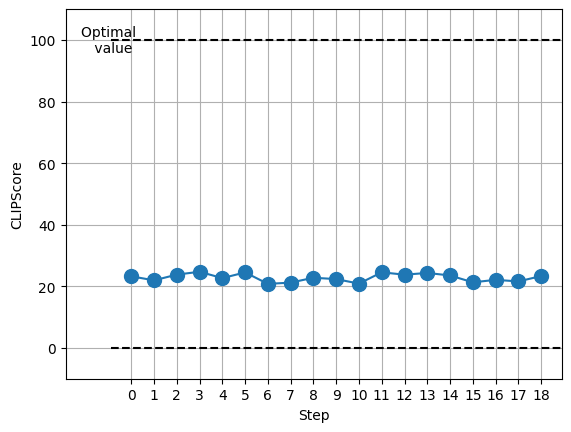

In [ ]:
fig_, ax_ = metric.plot(scores)